In [43]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# read in test image
landscape = cv2.imread("../data/otsu/landscape.jpg")
landscape_gray = cv2.cvtColor(landscape, cv2.COLOR_BGR2GRAY)
print(landscape_gray.shape)
print(landscape_gray.dtype)

(1600, 2000)
uint8


In [41]:
def plot(img, color = True):   
    # plt.figure(figsize=(10,10))
    if color:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img, cmap="gray")
    plt.show()

def plot_pair(img1, img2):
    # plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
    plt.show()

# plots mask with green overlay
def plot_overlay(img, mask):
    color_mask = np.stack([mask, mask, mask], axis=2)
    color_mask[:, :, 0][mask == 255] = 0
    color_mask[:, :, 2][mask == 255] = 0

    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.imshow(color_mask, alpha=0.2)
    plt.show()

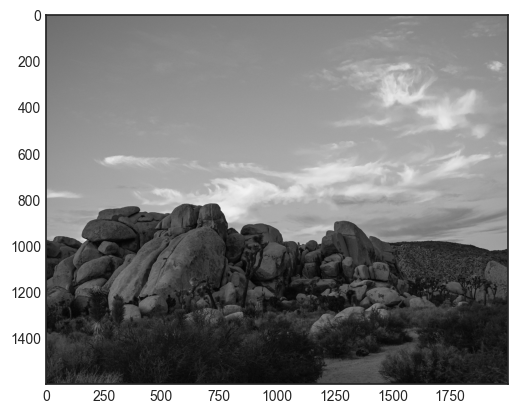

In [46]:
plt.style.use("seaborn-v0_8-white")
plot(landscape_gray)

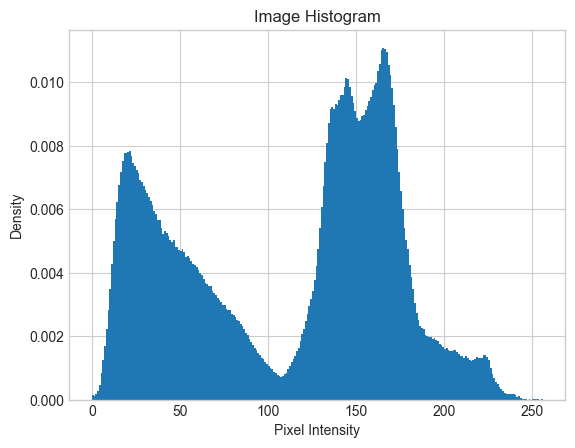

In [45]:
plt.style.use("seaborn-v0_8-whitegrid")

plt.hist(landscape_gray.ravel(), 256, [0, 256], density=True)
plt.title("Image Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Density")
plt.show()